## 1. Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Dataset

In [30]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

In [31]:
file_path = "DATA AIR QUALITY.Cleaned.csv"  # <-- update path if needed
df = pd.read_csv(file_path)


## 3. Data Cleaning

In [32]:
print("Shape of dataset:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
df["In your opinion, what is the main cause of air pollution?"] = df["In your opinion, what is the main cause of air pollution?"].fillna("Not Specified")
df.columns = [col.strip().replace(":", "").replace(" ", "_") for col in df.columns]


Shape of dataset: (133, 15)

Missing values:
 Age Group:                                                                                                 0
Gender:                                                                                                    0
Employment Status                                                                                          0
How would you rate the overall air quality in your area?                                                   0
Over the past 5 years, has the air quality in your area?                                                   0
Do you think the government is doing enough to improve air quality?                                        0
Have you experienced any of the following health symptoms due to air pollution? (Select all that apply)    0
Do you believe the air quality affects your ability to work or study?                                      0
Have you visited a doctor or health professional due to air quality-related health

## 4.  Basic Overview

In [33]:
print("\nColumn names:\n", df.columns.tolist())
print("\nData Types:\n", df.dtypes)


Column names:
 ['Age_Group', 'Gender', 'Employment_Status', 'How_would_you_rate_the_overall_air_quality_in_your_area?', 'Over_the_past_5_years,_has_the_air_quality_in_your_area?', 'Do_you_think_the_government_is_doing_enough_to_improve_air_quality?', 'Have_you_experienced_any_of_the_following_health_symptoms_due_to_air_pollution?_(Select_all_that_apply)', 'Do_you_believe_the_air_quality_affects_your_ability_to_work_or_study?', 'Have_you_visited_a_doctor_or_health_professional_due_to_air_quality-related_health_issues?', 'Are_you_aware_of_the_Air_Quality_Index_(AQI)_and_its_implications?', 'Do_you_take_any_precautions_when_air_quality_is_poor?_(Select_all_that_apply)', 'Would_you_support_stricter_government_regulations_to_reduce_air_pollution?', 'Do_you_avoid_outdoor_activities_during_periods_of_poor_air_quality?', 'How_often_do_you_check_the_air_quality_before_going_outside?', 'In_your_opinion,_what_is_the_main_cause_of_air_pollution?']

Data Types:
 Age_Group                          

## 5.Visualizations

## a. Distribution of Age Groups

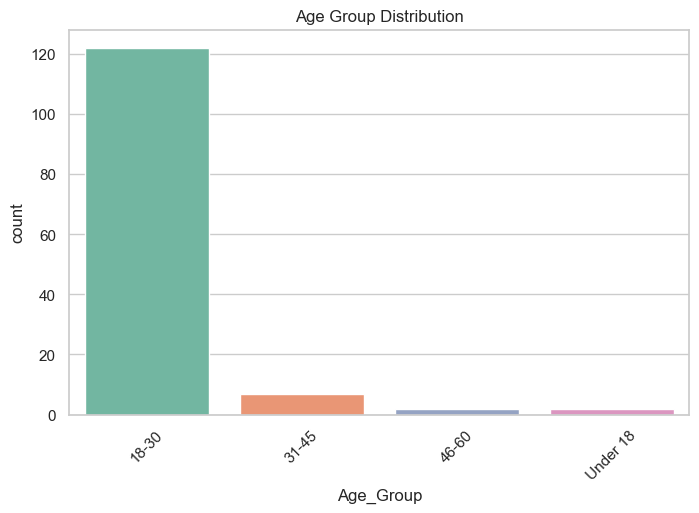

In [35]:
sns.countplot(data=df, x="Age_Group", hue="Age_Group", palette="Set2", legend=False)
plt.title("Age Group Distribution")
plt.xticks(rotation=45)
plt.show()


## b. Gender Distribution

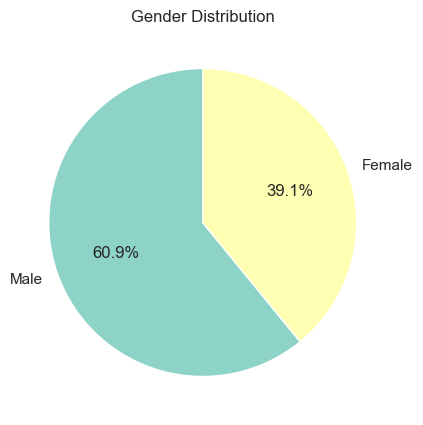

In [36]:

df["Gender"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=sns.color_palette("Set3"))
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

## c. Employment Status

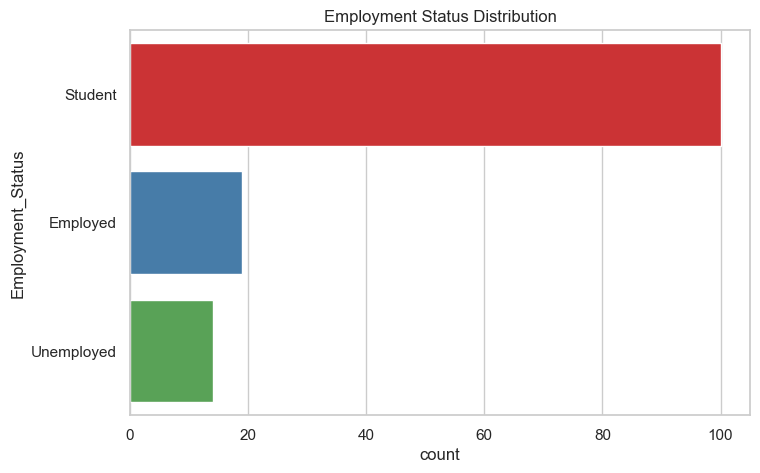

In [38]:
sns.countplot(data=df, y="Employment_Status", hue="Employment_Status", palette="Set1", legend=False)
plt.title("Employment Status Distribution")
plt.show()


## d. Air Quality Rating

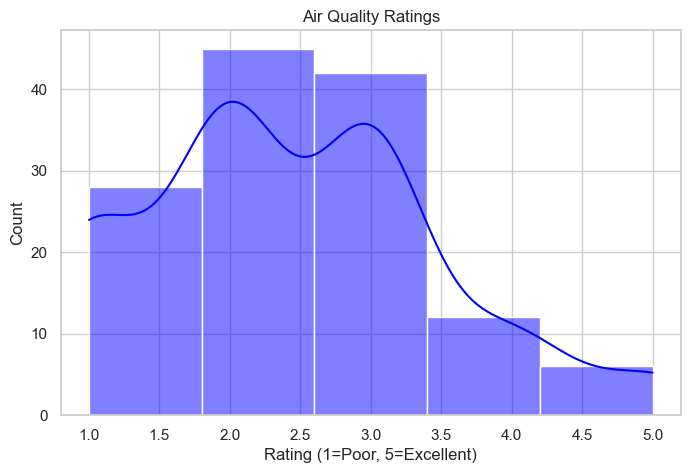

In [43]:
sns.histplot(df["How_would_you_rate_the_overall_air_quality_in_your_area?"], bins=5, kde=True, color="blue")
plt.title("Air Quality Ratings")
plt.xlabel("Rating (1=Poor, 5=Excellent)")
plt.show()


## e. Air Quality Rating by Age Group

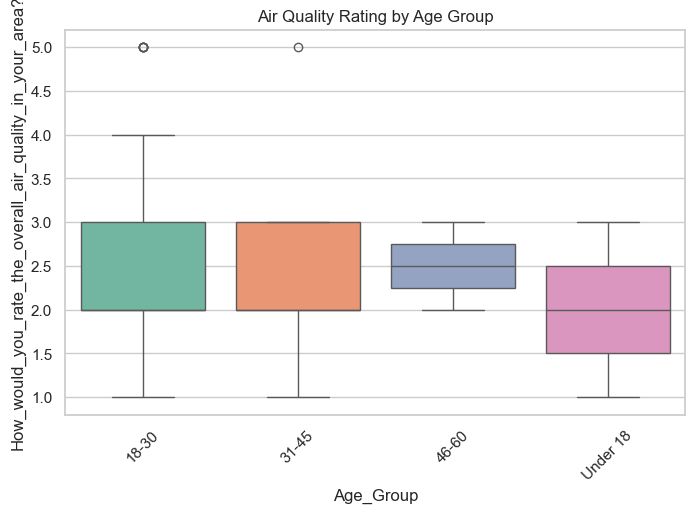

In [48]:
sns.boxplot(
    data=df,
    x="Age_Group",
    y="How_would_you_rate_the_overall_air_quality_in_your_area?",
    hue="Age_Group",       # required to use palette safely
    palette="Set2",
    legend=False           # removes duplicate legends
)
plt.title("Air Quality Rating by Age Group")
plt.xticks(rotation=45)
plt.show()


## f.Health Symptoms word frequency

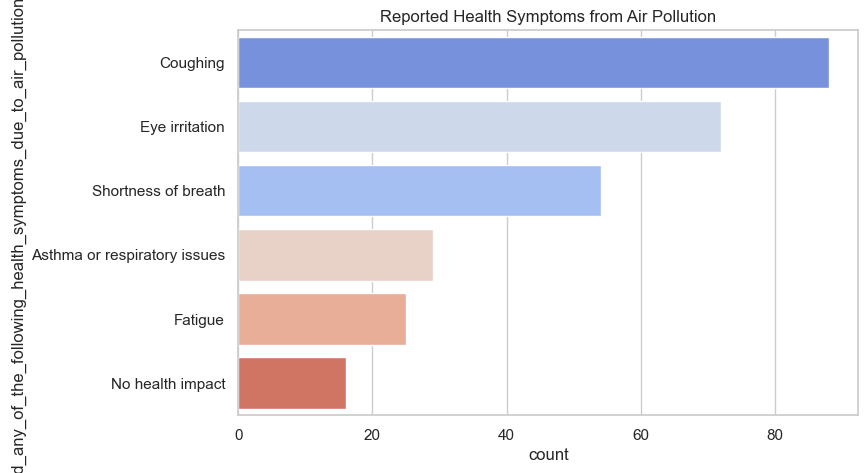

In [51]:
# Fix: use exact column name
symptoms_series = df["Have_you_experienced_any_of_the_following_health_symptoms_due_to_air_pollution?_(Select_all_that_apply)"].dropna().str.split(", ")

# Expand multiple selections into separate rows
symptoms_exploded = symptoms_series.explode()

# Plot
sns.countplot(
    y=symptoms_exploded,
    order=symptoms_exploded.value_counts().index,
    hue=symptoms_exploded,
    palette="coolwarm",
    legend=False
)
plt.title("Reported Health Symptoms from Air Pollution")
plt.show()


## g. Awareness of AQI

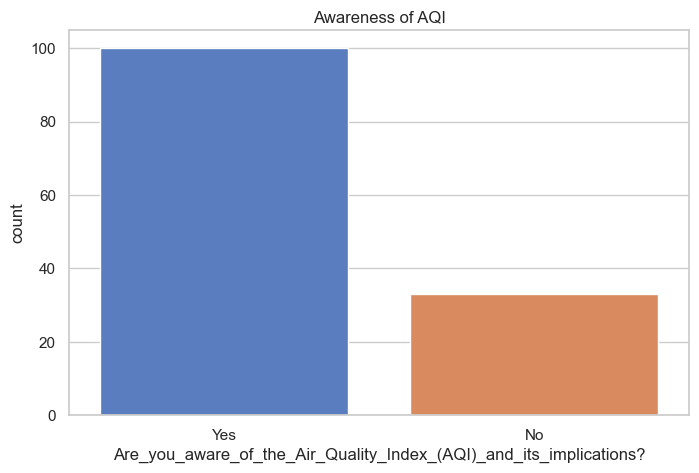

In [57]:
sns.countplot(
    data=df,
    x="Are_you_aware_of_the_Air_Quality_Index_(AQI)_and_its_implications?",
    hue="Are_you_aware_of_the_Air_Quality_Index_(AQI)_and_its_implications?",
    palette="muted",
    legend=False
)
plt.title("Awareness of AQI")
plt.show()


In [53]:
print(df.columns.tolist())


['Age_Group', 'Gender', 'Employment_Status', 'How_would_you_rate_the_overall_air_quality_in_your_area?', 'Over_the_past_5_years,_has_the_air_quality_in_your_area?', 'Do_you_think_the_government_is_doing_enough_to_improve_air_quality?', 'Have_you_experienced_any_of_the_following_health_symptoms_due_to_air_pollution?_(Select_all_that_apply)', 'Do_you_believe_the_air_quality_affects_your_ability_to_work_or_study?', 'Have_you_visited_a_doctor_or_health_professional_due_to_air_quality-related_health_issues?', 'Are_you_aware_of_the_Air_Quality_Index_(AQI)_and_its_implications?', 'Do_you_take_any_precautions_when_air_quality_is_poor?_(Select_all_that_apply)', 'Would_you_support_stricter_government_regulations_to_reduce_air_pollution?', 'Do_you_avoid_outdoor_activities_during_periods_of_poor_air_quality?', 'How_often_do_you_check_the_air_quality_before_going_outside?', 'In_your_opinion,_what_is_the_main_cause_of_air_pollution?']


## h. AQI Awareness vs Precautions

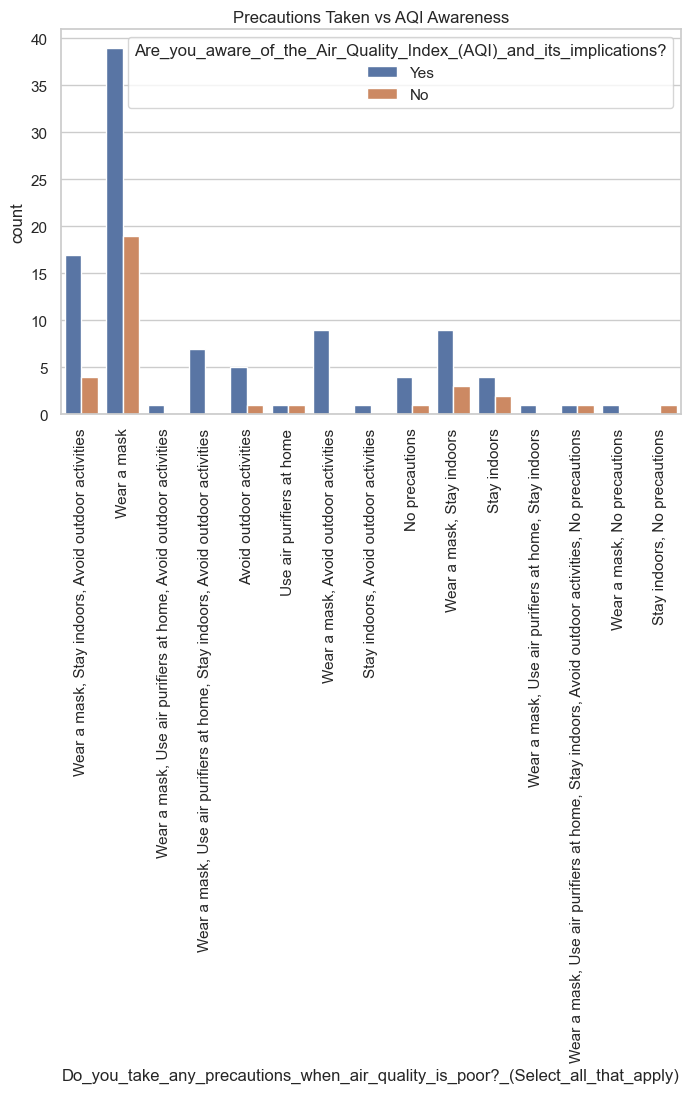

In [58]:

sns.countplot(data=df, x="Do_you_take_any_precautions_when_air_quality_is_poor?_(Select_all_that_apply)", hue="Are_you_aware_of_the_Air_Quality_Index_(AQI)_and_its_implications?")
plt.title("Precautions Taken vs AQI Awareness")
plt.xticks(rotation=90)
plt.show()